In [1]:
# 1. 평균구매가격 추가하기
# 2. 트리, SVM, Neural Networks 말고도 다른 알고리즘 써보기
# 3. 컬럼에 있는 값을 그래프나 그림으로 보여주기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import time
%matplotlib inline

In [3]:
# Store 폴더에 있는 train.csv.파일을 train 변수에 집어넣는다. encoding='CP949'는 한글이 깨지지 않게 하기 위함
train = pd.read_csv('Store/train.csv', encoding='CP949')

# train 값 5개를 순서대로 출력
train.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


(array([3.915e+03, 7.530e+02, 2.210e+02, 6.700e+01, 2.600e+01, 7.000e+00,
        5.000e+00, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([  1.,  50.,  99., 148., 197., 246., 295., 344., 393., 442., 491.]),
 <BarContainer object of 10 artists>)

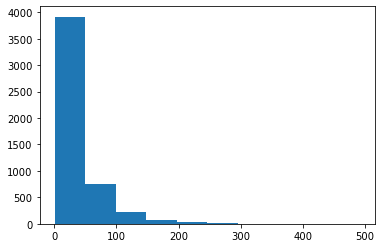

In [4]:
# 구매건수 그래프 출력
plt.hist(train['구매건수'])

In [5]:
# 0~50번 구매한 고객이 가장 많다.

(array([1.610e+02, 3.648e+03, 9.010e+02, 1.920e+02, 4.700e+01, 2.600e+01,
        1.000e+01, 9.000e+00, 4.000e+00, 2.000e+00]),
 array([-72822. ,  27071.9, 126965.8, 226859.7, 326753.6, 426647.5,
        526541.4, 626435.3, 726329.2, 826223.1, 926117. ]),
 <BarContainer object of 10 artists>)

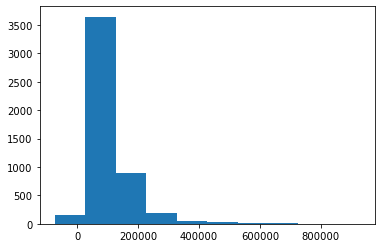

In [6]:
# 평균구매가격 그래프 출력
plt.hist(train['평균구매가격'])

In [7]:
# 50,000원 ~ 100,000원 사이가 가장 많다.

In [8]:
# 주구매코너 그래프 출력
# plt.hist(train['주구매코너'])

In [9]:
# 한글이라 밑에가 깨져보인다.

In [10]:
# 주구매코너의 비율을 계산
print(train['주구매코너'].value_counts(ascending=False, normalize=True))

# 주구매코너의 레이블
pCorner_label = train['주구매코너'].value_counts(ascending=False, normalize=True).index

# 주구매코너의 값
pCorner_vals = train['주구매코너'].value_counts(ascending=False, normalize=True).values

일반식품        0.2612
화장품         0.2412
유니캐주얼       0.0820
유아동복        0.0766
스포츠         0.0602
영캐주얼        0.0492
캐릭터캐주얼      0.0376
수입명품        0.0272
섬유          0.0192
니트단품        0.0182
트래디셔널캐주얼    0.0182
정장셔츠        0.0180
엘레강스캐주얼     0.0156
피혁A         0.0150
장신구         0.0136
피혁B         0.0112
디자이너부띠끄     0.0102
문화완구        0.0076
조리욕실        0.0056
가전          0.0036
기타바이어       0.0024
도자기크리스탈     0.0022
침구수예        0.0016
가구          0.0014
타운모피        0.0012
Name: 주구매코너, dtype: float64


C:\Users\014\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\014\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\014\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\014\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\014\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\014\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51109 missing from current font.

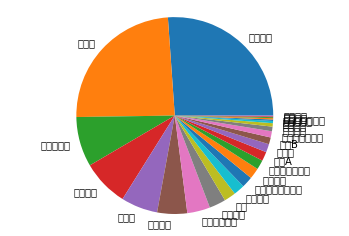

In [11]:
# 주구매코너의 원 그래프 작성
plt.pie(pCorner_vals, labels=pCorner_label)
plt.axis('equal')
plt.show()

In [12]:
# 마찬가지로 한글이라 깨져서 보이는듯하다.

## 결측치가 존재한다.

In [13]:
# train 정보 출력
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [14]:
# train에 결측치가 있는지 검사
train.isnull().sum()

custid          0
gender          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       945
겨울_구매건수       897
봄_구매건수        689
여름_구매건수      1022
아침_구매건수      1442
저녁_구매건수       967
점심_구매건수       145
주구매코너           0
dtype: int64

## 결측치 제거(변환)

In [15]:
# con에 결측치가 있는 컬럼들을 모았다. (재사용을 위함)
con = ['가을_구매건수', '겨울_구매건수', '봄_구매건수', '여름_구매건수', '아침_구매건수', '저녁_구매건수', '점심_구매건수']

In [16]:
from sklearn.impute import SimpleImputer
imputer_con = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_con.fit(train[con])

SimpleImputer(strategy='most_frequent')

In [17]:
# imputer_com의 내장함수인 transform으로 train의 con 부분 컬럼을 변환하여 주었다.
x = imputer_con.transform(train[con])

# 변환된 con 컬럼들의 값 출력
x

array([[ 1.,  9.,  6., ...,  1.,  6.,  9.],
       [ 1.,  5.,  4., ...,  3.,  1.,  6.],
       [ 7., 17., 12., ..., 10., 11., 15.],
       ...,
       [12.,  6.,  6., ..., 16.,  1., 21.],
       [ 6.,  4.,  2., ...,  1.,  2., 11.],
       [ 6.,  5., 10., ...,  8.,  5., 19.]])

In [18]:
# df1이라는 변수에 train을 복사하여 넣음. train 원본을 훼손하지 않기 위함.
df1 = train

In [19]:
# 데이터프레임 형태로 con의 컬럼을 가진 값들을 df1[con]에 넣어줌
df1[con] = pd.DataFrame(x, columns=df1[con].columns, index=train.index)

In [20]:
# df1이라는 변수에 train을 복사하여 넣음
df1 = train.copy()

In [21]:
# df1[con]에 x값을 넣음
df1[con] = x

In [22]:
# df1의 결축치 검사
df1.isnull().sum()

custid       0
gender       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
dtype: int64

In [23]:
df1 = train

In [24]:
df1[con] = pd.DataFrame(x, columns=df1[con].columns, index=df1.index)

In [25]:
df1 = train.copy()
df1[con] = x

In [26]:
df1.isnull().sum()

custid       0
gender       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
dtype: int64

In [27]:
# object(주구매코너) -> int8 
obj = ['주구매코너']
df1[obj] = df1[obj].apply(lambda x: x.astype('category').cat.codes)
df1.dtypes

custid         int64
gender         int64
총구매액           int64
구매건수           int64
평균구매가격         int64
평균할부개월수      float64
구매브랜드종류        int64
내점일수           int64
수입상품_구매비율    float64
주말방문비율       float64
가을_구매건수      float64
겨울_구매건수      float64
봄_구매건수       float64
여름_구매건수      float64
아침_구매건수      float64
저녁_구매건수      float64
점심_구매건수      float64
주구매코너           int8
dtype: object

## 머신러닝으로 확률 계산

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    5000 non-null   float64
 11  겨울_구매건수    5000 non-null   float64
 12  봄_구매건수     5000 non-null   float64
 13  여름_구매건수    5000 non-null   float64
 14  아침_구매건수    5000 non-null   float64
 15  저녁_구매건수    5000 non-null   float64
 16  점심_구매건수    5000 non-null   float64
 17  주구매코너      5000 non-null   int8   
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


In [30]:
dfX = df1.drop(['custid', 'gender'], axis=1)
dfy = df1['gender']
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [31]:
display(X_train.shape, X_test.shape)

(3750, 16)

(1250, 16)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
tree = DecisionTreeClassifier(max_depth=6, random_state=0)

In [34]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [35]:
pred_tree = tree.predict(X_test)
pred_tree

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
from sklearn.svm import SVC
svm = SVC(random_state = 0)
svm.fit(X_train, y_train)

SVC(random_state=0)

In [37]:
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

<font color = "darkgreen">
1. Decision Trees

In [39]:
display(tree.score(X_train, y_train))
display(tree.score(X_test, y_test))

0.736

0.6696

<font color = "darkgreen">
2. SVM

In [40]:
display(svm.score(X_train, y_train))
display(svm.score(X_test, y_test))

0.6930666666666667

0.7072

<font color = "darkgreen">
3. Neural Networks

In [41]:
display(mlp.score(X_train, y_train))
display(mlp.score(X_test, y_test))

0.6925333333333333

0.7064

<font color = "darkgreen">
4. KNN

In [42]:
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)
knn.score(X_test, y_test)

0.6048

In [43]:
best_model = svm   # Change this code if the best model is not decision tree.
best_model.score(X_test, y_test)

0.7072

In [44]:
# 랜덤 모형의 성능과 개발 모형의 성능을 비교한다.

from sklearn.dummy import DummyClassifier
print(y_test.value_counts())
DummyClassifier(strategy='most_frequent').fit(X_train, y_train).score(X_test, y_test)

0    883
1    367
Name: gender, dtype: int64


0.7064

## Cross-Validation

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#model = KNeighborsClassifier()
model = LogisticRegression()
#model = DecisionTreeClassifier()

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [47]:
scores = cross_val_score(model, dfX, dfy); scores

array([0.696, 0.697, 0.695, 0.697, 0.695])

In [48]:
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))
# 분산이 작으면 Overfitting 이 적다

Mean: 0.696
Std: 0.001
Min: 0.695
Max: 0.697


### 남녀 비율 조정

In [49]:
df1['gender'].value_counts()

0    3479
1    1521
Name: gender, dtype: int64

In [50]:
from imblearn.combine import *

In [51]:
from imblearn.combine import SMOTETomek

In [52]:
scores = cross_val_score(model, dfX, dfy); scores

array([0.696, 0.697, 0.695, 0.697, 0.695])

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [54]:
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [55]:
tree3 = DecisionTreeClassifier(max_depth=4, random_state=0)

tree3.fit(X_train, y_train)
y_pred3 = tree3.predict(X_test)

print(classification_report(y_test, y_pred3))
# (precision) 0 이라고 예측한 데이터의 71%만 실제로 0
# (precision) 1 이라고 예측한 데이터의 34%만 실제로 1
# (recall) 실제 0인 데이터중 98%가 0으로 판별됨 
# (recall) 실제 1인 데이타중 3%만 1로 판별됨
# recall 에서 0과 1의 판별결과가 현격한 차이가 남.

              precision    recall  f1-score   support

           0       0.71      0.98      0.82       883
           1       0.34      0.03      0.06       367

    accuracy                           0.70      1250
   macro avg       0.53      0.50      0.44      1250
weighted avg       0.60      0.70      0.60      1250



In [56]:
from imblearn.under_sampling import TomekLinks

In [57]:
XX, yy = TomekLinks().fit_sample(X_train, y_train)
tree0 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree0.fit(XX, yy)
y_pred0 = tree0.predict(X_test)

print(classification_report(y_test, y_pred0))
# Under-Sampling 기법은 precision/recall/f1-score 개선이 미미함

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       883
           1       0.28      0.16      0.20       367

    accuracy                           0.63      1250
   macro avg       0.49      0.49      0.48      1250
weighted avg       0.58      0.63      0.60      1250



In [58]:
from imblearn.combine import SMOTETomek

In [59]:
# Tomek links: a under-sampling class method
XX, yy = SMOTETomek().fit_sample(X_train, y_train)
tree0 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree0.fit(XX, yy)
y_pred0 = tree0.predict(X_test)

print(classification_report(y_test, y_pred0))

              precision    recall  f1-score   support

           0       0.73      0.64      0.68       883
           1       0.34      0.44      0.38       367

    accuracy                           0.58      1250
   macro avg       0.53      0.54      0.53      1250
weighted avg       0.62      0.58      0.60      1250



In [60]:
XX, yy = SMOTETomek(random_state=0).fit_sample(X_train, y_train)

In [61]:
tree3 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree3.fit(XX, yy)
y_pred3 = tree3.predict(X_test)

print(classification_report(y_test, y_pred3))
# (precision) 0 이라고 예측한 데이터의 74%만 실제로 0
# (precision) 1 이라고 예측한 데이터의 33%만 실제로 1
# (recall) 실제 0인 데이터중 56%만 0으로 판별됨 
# (recall) 실제 1인 데이타중 52%만 1로 판별됨

              precision    recall  f1-score   support

           0       0.74      0.56      0.64       883
           1       0.33      0.52      0.41       367

    accuracy                           0.55      1250
   macro avg       0.54      0.54      0.52      1250
weighted avg       0.62      0.55      0.57      1250



In [62]:
tree3.score(X_test,y_test)

0.5504

In [63]:
from sklearn.dummy import DummyClassifier
print(y_test.value_counts())
DummyClassifier(strategy='most_frequent').fit(X_train, y_train).score(X_test, y_test)

0    883
1    367
Name: gender, dtype: int64


0.7064

In [64]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [65]:
import xgboost as xgb
from xgboost import plot_importance
#import pan
import numpy as np

In [66]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [67]:
dtrain

In [68]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [69]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기
wlist = [(dtrain, 'train'),(dtest, 'eval')]
# 하이퍼 파라미터와 early stoppinig 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[10:38:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.67505	eval-logloss:0.67724
[1]	train-logloss:0.66029	eval-logloss:0.66432
[2]	train-logloss:0.64789	eval-logloss:0.65309
[3]	train-logloss:0.63754	eval-logloss:0.64475
[4]	train-logloss:0.62892	eval-logloss:0.63700
[5]	train-logloss:0.62165	eval-logloss:0.63109
[6]	train-logloss:0.61543	eval-logloss:0.62605
[7]	train-logloss:0.61015	eval-logloss:0.62206
[8]	train-logloss:0.60568	eval-logloss:0.61911
[9]	train-logloss:0.60181	eval-logloss:0.61679
[10]	train-logloss:0.59833	eval-logloss:0.61454
[11]	train-logloss:0.59566	eval-logloss:0.61296
[12]	train-logloss:0.59313	eval-logloss:0

[162]	train-logloss:0.50162	eval-logloss:0.60652
[163]	train-logloss:0.50114	eval-logloss:0.60649
[164]	train-logloss:0.50081	eval-logloss:0.60659
[165]	train-logloss:0.50036	eval-logloss:0.60648
[166]	train-logloss:0.50027	eval-logloss:0.60658
[167]	train-logloss:0.49972	eval-logloss:0.60645
[168]	train-logloss:0.49956	eval-logloss:0.60645
[169]	train-logloss:0.49897	eval-logloss:0.60664
[170]	train-logloss:0.49866	eval-logloss:0.60647
[171]	train-logloss:0.49806	eval-logloss:0.60619
[172]	train-logloss:0.49759	eval-logloss:0.60631
[173]	train-logloss:0.49721	eval-logloss:0.60650
[174]	train-logloss:0.49665	eval-logloss:0.60644
[175]	train-logloss:0.49635	eval-logloss:0.60655
[176]	train-logloss:0.49601	eval-logloss:0.60646
[177]	train-logloss:0.49582	eval-logloss:0.60652
[178]	train-logloss:0.49552	eval-logloss:0.60657
[179]	train-logloss:0.49506	eval-logloss:0.60660
[180]	train-logloss:0.49490	eval-logloss:0.60636
[181]	train-logloss:0.49443	eval-logloss:0.60650
[182]	train-logloss:

[330]	train-logloss:0.44251	eval-logloss:0.61819
[331]	train-logloss:0.44225	eval-logloss:0.61826
[332]	train-logloss:0.44173	eval-logloss:0.61854
[333]	train-logloss:0.44140	eval-logloss:0.61839
[334]	train-logloss:0.44133	eval-logloss:0.61847
[335]	train-logloss:0.44126	eval-logloss:0.61859
[336]	train-logloss:0.44118	eval-logloss:0.61855
[337]	train-logloss:0.44096	eval-logloss:0.61872
[338]	train-logloss:0.44093	eval-logloss:0.61864
[339]	train-logloss:0.44088	eval-logloss:0.61876
[340]	train-logloss:0.44068	eval-logloss:0.61862
[341]	train-logloss:0.44035	eval-logloss:0.61866
[342]	train-logloss:0.44003	eval-logloss:0.61894
[343]	train-logloss:0.43956	eval-logloss:0.61898
[344]	train-logloss:0.43946	eval-logloss:0.61912
[345]	train-logloss:0.43942	eval-logloss:0.61923
[346]	train-logloss:0.43900	eval-logloss:0.61925
[347]	train-logloss:0.43861	eval-logloss:0.61919
[348]	train-logloss:0.43838	eval-logloss:0.61951
[349]	train-logloss:0.43798	eval-logloss:0.61975
[350]	train-logloss:

## xgboost 추가

In [70]:
new = pd.read_csv('test.csv', encoding='CP949')
new.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,장신구
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,유아동복
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,유아동복
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,15.0,9.0,17.0,NaN,4.0,42.0,수입명품
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,NaN,5.0,3.0,NaN,NaN,26.0,스포츠


In [71]:
X_train.head()

,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
4154,404285,3,134762,2.3,3,2,33.3,0.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,22
4820,6169420,38,162353,2.1,29,26,13.2,34.6,8.0,13.0,7.0,10.0,13.0,1.0,25.0,10
1202,2407157,32,75224,1.7,22,17,9.4,52.9,3.0,3.0,6.0,20.0,3.0,8.0,21.0,14
3759,4664283,78,59798,1.8,24,22,1.3,45.5,17.0,12.0,29.0,20.0,1.0,23.0,55.0,14
622,3299200,11,299927,1.9,9,3,45.5,33.3,1.0,1.0,11.0,1.0,1.0,1.0,11.0,16


In [72]:
from sklearn.impute import SimpleImputer
imputer_con = SimpleImputer(strategy="most_frequent")  
imputer_con.fit(new[con])

SimpleImputer(strategy='most_frequent')

In [73]:
new[obj] = new[obj].apply(lambda x: x.astype('category').cat.codes) 

In [74]:
new.head(3)

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,15
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,13
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,13


In [75]:
dtest_ndf = xgb.DMatrix(data=new.iloc[:, 1:])

In [76]:
new['pred'] = xgb_model.predict(dtest_ndf)
new.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,pred
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,15,0.668461
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,13,0.239335
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,13,0.342521
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,15.0,9.0,17.0,NaN,4.0,42.0,8,0.260023
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,NaN,5.0,3.0,NaN,NaN,26.0,9,0.661118


In [77]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.273 0.453 0.275 0.449 0.191 0.158 0.161 0.193 0.18  0.325]


In [78]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [79]:
get_clf_eval(y_test, preds)

오차행렬
[[787  96]
 [315  52]]
정확도: 0.6712, 정밀도: 0.3514, 재현율: 0.1417


In [80]:
XX.columns

Index(['총구매액', '구매건수', '평균구매가격', '평균할부개월수', '구매브랜드종류', '내점일수', '수입상품_구매비율',
       '주말방문비율', '가을_구매건수', '겨울_구매건수', '봄_구매건수', '여름_구매건수', '아침_구매건수',
       '저녁_구매건수', '점심_구매건수', '주구매코너'],
      dtype='object')

In [81]:
col = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p']

In [82]:
XX.head()

,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,404285,3,134762,2.3,3,2,33.3,0.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,22
1,2407157,32,75224,1.7,22,17,9.4,52.9,3.0,3.0,6.0,20.0,3.0,8.0,21.0,14
2,4664283,78,59798,1.8,24,22,1.3,45.5,17.0,12.0,29.0,20.0,1.0,23.0,55.0,14
3,3299200,11,299927,1.9,9,3,45.5,33.3,1.0,1.0,11.0,1.0,1.0,1.0,11.0,16
4,555480,5,111096,2.6,4,4,20.0,75.0,2.0,1.0,1.0,3.0,1.0,3.0,2.0,17


In [83]:
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(nestimators=400)
evals = [(X_test, y_test)]
lgbm_wrapper.fit(XX, yy, feature_name=col, early_stopping_rounds=100, 
                 eval_metric="logloss", eval_set=evals, verbose=True)
# pred = lgbm_wrapper.predict(X_test)

[LightGBM] [Warning] Unknown parameter: nestimators
[1]	valid_0's binary_logloss: 0.684352
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.678241
[3]	valid_0's binary_logloss: 0.672711
[4]	valid_0's binary_logloss: 0.666675
[5]	valid_0's binary_logloss: 0.662707
[6]	valid_0's binary_logloss: 0.66007
[7]	valid_0's binary_logloss: 0.657454
[8]	valid_0's binary_logloss: 0.656766
[9]	valid_0's binary_logloss: 0.653329
[10]	valid_0's binary_logloss: 0.651607
[11]	valid_0's binary_logloss: 0.651391
[12]	valid_0's binary_logloss: 0.649682
[13]	valid_0's binary_logloss: 0.649541
[14]	valid_0's binary_logloss: 0.647985
[15]	valid_0's binary_logloss: 0.647646
[16]	valid_0's binary_logloss: 0.64678
[17]	valid_0's binary_logloss: 0.645509
[18]	valid_0's binary_logloss: 0.64361
[19]	valid_0's binary_logloss: 0.643435
[20]	valid_0's binary_logloss: 0.64084
[21]	valid_0's binary_logloss: 0.641548
[22]	valid_0's binary_logloss: 0.64204
[23]	valid_0's binar

LGBMClassifier(nestimators=400)

In [84]:
get_clf_eval(y_test, preds)

오차행렬
[[787  96]
 [315  52]]
정확도: 0.6712, 정밀도: 0.3514, 재현율: 0.1417


### Features engineering

In [85]:
# 학습용 데이터에 '코너별구매건' 컬럼 추가

dt0 = df1.groupby(['주구매코너'])['구매건수'].agg(sum)   
df0 = dt0.to_frame().reset_index()
df0.columns = ['주구매코너', '코너별구매건']
#df0.head(3)
df1_ = pd.merge(df1, df0, on='주구매코너')
# dataP_.head()
print(df1_[(df1_['주구매코너']==1)].groupby(['gender'])['총구매액'].agg(sum))
print(df1_[(df1_['주구매코너']==1)].groupby(['gender'])['구매건수'].agg(sum))
df1_.head()

gender
0    31111117
1    29039091
Name: 총구매액, dtype: int64
gender
0    214
1    101
Name: 구매건수, dtype: int64


,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,코너별구매건
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,1.0,9.0,6.0,1.0,1.0,6.0,9.0,24,25740
1,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,1.0,1.0,18.0,10.0,24,25740
2,82,0,752200,5,150440,2.6,5,3,60.0,100.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0,24,25740
3,92,0,1145400,13,88108,1.9,7,9,23.1,22.2,1.0,1.0,2.0,10.0,1.0,8.0,4.0,24,25740
4,100,0,442160,16,27635,1.0,10,6,25.0,33.3,1.0,5.0,11.0,1.0,1.0,3.0,13.0,24,25740


In [86]:
# 건수 Feature들을 최소단위 정보인 구매건당 구매액로 변경
def createFeatures(df_p):
    df_p['아침구매액'] = np.round(df_p['총구매액']*(df_p['아침_구매건수'] /df_p['구매건수'] ), 3)
    df_p['점심구매액'] = np.round(df_p['총구매액']*(df_p['점심_구매건수'] /df_p['구매건수'] ), 3)
    df_p['저녁구매액'] = np.round(df_p['총구매액']*(df_p['저녁_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['봄구매액']   = np.round(df_p['총구매액']*(df_p['봄_구매건수'] /df_p['구매건수'] ), 3) 
    df_p['여름구매액'] = np.round(df_p['총구매액']*(df_p['여름_구매건수'] /df_p['구매건수'] ), 3) 
    df_p['가을구매액'] = np.round(df_p['총구매액']*(df_p['가을_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['겨울구매액'] = np.round(df_p['총구매액']*(df_p['겨울_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['내점구매율'] = np.round(df_p['구매건수'] /df_p['내점일수'], 3)

def dropFeatures(df_p):
    drop_cols = ['아침_구매건수', '점심_구매건수', '저녁_구매건수', '총구매액', '구매건수',
         '봄_구매건수', '여름_구매건수', '가을_구매건수', '겨울_구매건수', '내점일수'] 
    
    return df_p.drop(drop_cols, axis=1)

createFeatures(df1_)
df2 = dropFeatures(df1_) 
df2[(df2['주구매코너']==2)].head()

,custid,gender,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,점심구매액,저녁구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율
4123,363,0,90960,3.0,4,20.0,25.0,2,149,90960.000,90960.000,363840.000,454800.000,90960.000,90960.000,90960.000,1.250
4124,4822,0,248049,2.3,10,10.5,33.3,2,149,992196.632,3224639.053,496098.316,744147.474,992196.632,1736344.105,1240245.789,1.583
4125,11617,1,124767,3.8,8,25.0,62.5,2,149,124766.667,499066.667,873366.667,249533.333,499066.667,748600.000,124766.667,1.500
4126,12979,0,79250,1.7,10,0.0,33.3,2,149,554750.000,396250.000,79250.000,158500.000,79250.000,792500.000,79250.000,4.000
4127,16414,0,31625,1.0,6,12.5,14.3,2,149,63250.000,189750.000,31625.000,94875.000,158125.000,31625.000,31625.000,1.143


In [87]:
import seaborn as sns

In [89]:
# sns.heatmap(df2.corr(), annot=True)
# plt.matshow(corr)

In [90]:
# 학습용 데이터 확정

dfT = df2.copy()
dfD = dfT.drop(['주말방문비율', '저녁구매액', '평균할부개월수','수입상품_구매비율','주구매코너'], axis=1)

dfy = dfD['gender']
dfX = dfD.drop('gender', axis=1)
dfX.tail(2)

,custid,평균구매가격,구매브랜드종류,코너별구매건,아침구매액,점심구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율
4998,49732,314259,23,2219,1.477015e+07,3.928233e+07,8484982.398,2.388365e+07,1.445590e+07,1.319886e+07,2.449
4999,49954,183065,10,2219,5.491941e+05,2.562906e+06,1098388.235,1.830647e+05,7.322588e+05,1.098388e+06,1.308


In [91]:
dfX.shape

(5000, 11)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [93]:
X_train.columns

Index(['custid', '평균구매가격', '구매브랜드종류', '코너별구매건', '아침구매액', '점심구매액', '봄구매액',
       '여름구매액', '가을구매액', '겨울구매액', '내점구매율'],
      dtype='object')

In [94]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 4154 to 2732
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   custid   3750 non-null   int64  
 1   평균구매가격   3750 non-null   int64  
 2   구매브랜드종류  3750 non-null   int64  
 3   코너별구매건   3750 non-null   int64  
 4   아침구매액    3750 non-null   float64
 5   점심구매액    3750 non-null   float64
 6   봄구매액     3750 non-null   float64
 7   여름구매액    3750 non-null   float64
 8   가을구매액    3750 non-null   float64
 9   겨울구매액    3750 non-null   float64
 10  내점구매율    3750 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 351.6 KB


In [95]:
X_train.head(2)

,custid,평균구매가격,구매브랜드종류,코너별구매건,아침구매액,점심구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율
4154,9089,84931,8,825,84930.769,594515.385,84930.769,84930.769,679446.154,424653.846,2.167
4820,35437,22790,11,1259,45580.000,341850.000,45580.000,45580.000,113950.000,250690.000,1.538


In [96]:
xCol = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

In [97]:
lgbm_wrapper = LGBMClassifier(nestimators=400)
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, feature_name=xCol, early_stopping_rounds=100, 
                 eval_metric="logloss", eval_set=evals)
pred = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.623607
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.617734
[3]	valid_0's binary_logloss: 0.612332
[4]	valid_0's binary_logloss: 0.608624
[5]	valid_0's binary_logloss: 0.60581
[6]	valid_0's binary_logloss: 0.602701
[7]	valid_0's binary_logloss: 0.599312
[8]	valid_0's binary_logloss: 0.597359
[9]	valid_0's binary_logloss: 0.595842
[10]	valid_0's binary_logloss: 0.593929
[11]	valid_0's binary_logloss: 0.593083
[12]	valid_0's binary_logloss: 0.592246
[13]	valid_0's binary_logloss: 0.591069
[14]	valid_0's binary_logloss: 0.58927
[15]	valid_0's binary_logloss: 0.588485
[16]	valid_0's binary_logloss: 0.58784
[17]	valid_0's binary_logloss: 0.588149
[18]	valid_0's binary_logloss: 0.58785
[19]	valid_0's binary_logloss: 0.588065
[20]	valid_0's binary_logloss: 0.588324
[21]	valid_0's binary_logloss: 0.588374
[22]	valid_0's binary_logloss: 0.588856
[23]	valid_0's binary_logloss: 0.58921
[24]	valid_0's binary_logloss: 0

In [98]:
get_clf_eval(y_test, preds)

오차행렬
[[755  92]
 [347  56]]
정확도: 0.6488, 정밀도: 0.3784, 재현율: 0.1390


## 컬럼 더 만들어서 덧붙이기

In [99]:
# 파생변수를 저장할 빈 리스트를 만든다
features = []

In [100]:
# 파생변수1 : 코너별구매건수
f = df1.groupby('custid')['구매건수'].agg([('코너별구매건수', 'sum')]).reset_index()
features.append(f)
f

,custid,코너별구매건수
0,18,15
1,21,9
2,23,36
3,26,28
4,35,5
...,...,...
4995,49952,93
4996,49954,17
4997,49957,37
4998,49975,13


In [101]:
# 파생변수2 : 코너별구매액
f = df1.groupby('custid')['총구매액'].agg([('코너별구매액', 'sum')]).reset_index()
features.append(f)
f

,custid,코너별구매액
0,18,680100
1,21,353450
2,23,5671400
3,26,1964000
4,35,885000
...,...,...
4995,49952,6666517
4996,49954,3112100
4997,49957,5852482
4998,49975,654498


In [ ]:
# 파생변수3 : 평균구매가격
f = df1.groupby('custid')['평균구매가격'].agg([('코너별평균구매가격', 'mean')]).reset_index()
features.append(f); f

In [ ]:
# 파생변수4 : 구매건수합

In [ ]:
df_sum = df1.groupby('주구매코너')['구매건수'].sum()
df_sum = df_sum.reset_index()
df_sum.columns = ['주구매코너', '코너별구매건']
df_sum.head()

In [ ]:
# 주구매코너의 구매건수를 merge하여 넣으려다 실패함
df_sum = df1.groupby('주구매코너')['구매건수'].sum()

In [ ]:
df_sum.head()

In [ ]:
# 아침 구매건수 평균값을 구하여 아침 구매건수가 평균값을 넘으면 1, 못넘으면 0

In [ ]:
morning = df1['아침_구매건수']
morning.mean()

In [ ]:
is_lower = df1['아침_구매건수'] < morning.mean()
is_lower.columns = 
df_sum.columns = ['주구매코너', '코너별구매건']
is_lower.reset_index()
# is_lower['아침_구매건수']

In [ ]:
# 파생변수2 : 코너별구매액
f = df1.groupby('custid')['총구매액'].agg([('코너별구매액', 'sum')]).reset_index()
features.append(f)
f

In [ ]:
# 총구매액 평균값을 구하여 총구매액이 평균값을 넘으면 1, 못넘으면 0

In [ ]:
total_buy = df1['총구매액']
print(total_buy.mean())
total_buy

In [ ]:
tb = df1['총구매액'] < total_buy.mean()
tb.reset_index()

In [ ]:
tb = tb.rename(columns={'index'=''})

In [ ]:
features

In [ ]:
df_train = pd.DataFrame({'custid': df1.custid.unique()})
df_train

In [ ]:
for f in features:
    df_train = pd.merge(df_train, f, how='left')
    
display(df_train) 

In [ ]:
# 데이터 합치기
df_merge = df1.merge(df_train, how='left', on='custid')
df_merge

In [ ]:
dfX = df_merge.drop(['custid', 'gender', '아침_구매건수', '저녁_구매건수', '점심_구매건수'], axis=1)
dfy = df_merge['gender']
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

<font color = "darkgreen">
SVM

In [ ]:
display(svm.score(X_train, y_train))
display(svm.score(X_test, y_test))